Before running our code, we need these files, make sure they are in the same directory. Find them in README file on github.

- 'CPIAUCSL.csv' - Represents CPI (inflation measure).(Monthly)
- 'Metro_median_sale_price_uc_sfrcondo_week.csv' - Represents median sales price for US houses.
- 'Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv' - Represents zillow home value index.
- 'MORTGAGE30US.csv' - Represents mortgage interest rates. (Weekly)
- 'RRVRUSQ156N.csv' - Represents rental vacancy rate. (Quartely)

LOADING FEDERAL RESERVE DATA

In [1]:
import pandas as pd

fed_files = ["MORTGAGE30US.csv","RRVRUSQ156N.csv","CPIAUCSL.csv"]

dfs = [pd.read_csv(f, parse_dates=True, index_col=0) for f in fed_files]

In [2]:
dfs[0]

,MORTGAGE30US
DATE,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2022-07-14,5.51
2022-07-21,5.54
2022-07-28,5.30


Morgage interest rates, Data is weekly.

In [3]:
dfs[1]

,RRVRUSQ156N
DATE,
1956-01-01,6.2
1956-04-01,5.9
1956-07-01,6.3
1956-10-01,5.8
1957-01-01,5.3
...,...
2021-04-01,6.2
2021-07-01,5.8
2021-10-01,5.6


Rental vacancy rate, data is quarterly

In [4]:
dfs[2]

,CPIAUCSL
DATE,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2022-03-01,287.708
2022-04-01,288.663
2022-05-01,291.474


Inflation (CPI measure), Data is monthly

Because all of our data is on different time lines we will have to merge them. To do this we will need to concatenate or combine them. I used pandas concat function to do this.

In [5]:
fed_data = pd.concat(dfs, axis=1)

In [6]:
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1947-01-01,NaN,NaN,21.48
1947-02-01,NaN,NaN,21.62
1947-03-01,NaN,NaN,22.00
1947-04-01,NaN,NaN,22.00
1947-05-01,NaN,NaN,21.95
...,...,...,...
2022-07-14,5.51,NaN,NaN
2022-07-21,5.54,NaN,NaN
2022-07-28,5.30,NaN,NaN


Gaps and Issues / Missing values beacuse of different time lines.

In [7]:
fed_data.tail(50)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2021-11-01,NaN,NaN,278.524
2021-11-04,3.09,NaN,NaN
2021-11-10,2.98,NaN,NaN
2021-11-18,3.10,NaN,NaN
2021-11-24,3.10,NaN,NaN
2021-12-01,NaN,NaN,280.126
2021-12-02,3.11,NaN,NaN
2021-12-09,3.10,NaN,NaN
2021-12-16,3.12,NaN,NaN


Because data is on different time lines data is not aligned. To solve this we will do something called forward filling. (rates stay constant in the period they are released) Ex: Rental vaccancy rate is released quartely so it remains constant throughout the quarter, Inflation data is released the first of the month so it remains constant the whole month. Same with mortgage interest rates but its weekly.

In [8]:
fed_data = fed_data.ffill()

In [9]:
fed_data.tail(50)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2021-11-01,3.14,5.6,278.524
2021-11-04,3.09,5.6,278.524
2021-11-10,2.98,5.6,278.524
2021-11-18,3.10,5.6,278.524
2021-11-24,3.10,5.6,278.524
2021-12-01,3.10,5.6,280.126
2021-12-02,3.11,5.6,280.126
2021-12-09,3.10,5.6,280.126
2021-12-16,3.12,5.6,280.126


Data is now filled according to the values timeline.

LOADING ZILLOW HOUSE PRICE DATA

In [10]:
zillow_files = ["Metro_median_sale_price_uc_sfrcondo_week.csv","Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv"]

In [11]:
dfs = [pd.read_csv(f) for f in zillow_files]

In [12]:
dfs[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2022-05-07,2022-05-14,2022-05-21,2022-05-28,2022-06-04,2022-06-11,2022-06-18,2022-06-25,2022-07-02,2022-07-09
0,102001,0,United States,Country,NaN,190000.0,190000.0,193000.0,189900.0,194900.0,...,369900.0,370000.0,370000.0,375000.0,375000.0,370000.0,375000.0,370000.0,370000.0,362500.0
1,394913,1,"New York, NY",Msa,NY,400000.0,418250.0,420000.0,420000.0,400000.0,...,550000.0,555000.0,550000.0,575000.0,575000.0,578000.0,590000.0,582000.0,585000.0,595000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,497500.0,515000.0,520000.0,525000.0,498250.0,...,914000.0,925000.0,925000.0,951000.0,950000.0,920500.0,925000.0,900000.0,900500.0,906000.0
3,394463,3,"Chicago, IL",Msa,IL,245000.0,245000.0,251000.0,255000.0,255000.0,...,315000.0,310000.0,315500.0,315000.0,330000.0,324950.0,335000.0,325000.0,325000.0,315000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,144250.0,148900.0,139000.0,143700.0,145900.0,...,422000.0,430000.0,430000.0,425000.0,440000.0,425000.0,427750.0,426000.0,420000.0,420000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,394528,90,"Daytona Beach, FL",Msa,FL,NaN,170000.0,182400.0,170000.0,170000.0,...,340500.0,345000.0,327700.0,345000.0,350000.0,343250.0,359900.0,352000.0,336000.0,342990.0
80,394531,91,"Des Moines, IA",Msa,IA,138000.0,160000.0,150000.0,151750.0,154500.0,...,270000.0,285250.0,295000.0,273450.0,301000.0,290000.0,300900.0,281900.0,289250.0,280000.0
81,395006,100,"Provo, UT",Msa,UT,NaN,206000.0,215500.0,210000.0,210000.0,...,527000.0,540000.0,535000.0,552500.0,543750.0,571000.0,530300.0,569900.0,539950.0,572500.0
82,394549,104,"Durham, NC",Msa,NC,210000.0,170000.0,170500.0,197500.0,180000.0,...,456000.0,450000.0,428500.0,480000.0,465000.0,440000.0,450250.0,416000.0,465000.0,435250.0


In [13]:
dfs = [pd.DataFrame(df.iloc[4,5:]) for df in dfs]

This statement picks the first row of data and cuts off the first five columns (does it for both dataframes) 

In [14]:
dfs[0]

,4
2008-02-02,144250.0
2008-02-09,148900.0
2008-02-16,139000.0
2008-02-23,143700.0
2008-03-01,145900.0
...,...
2022-06-11,425000.0
2022-06-18,427750.0
2022-06-25,426000.0
2022-07-02,420000.0


House sales price data, comes out weekly

In [15]:
dfs[1]

,4
1996-01-31,113283.512989
1996-02-29,113199.113561
1996-03-31,113519.423633
1996-04-30,114048.064719
1996-05-31,114287.444295
...,...
2022-03-31,376522.090399
2022-04-30,391696.585402
2022-05-31,399613.324087
2022-06-30,401254.775442


House value data, (comes out monthly on the 30/31st)

In [16]:
for df in dfs:
    df.index = pd.to_datetime(df.index)
    df["month"] = df.index.to_period("M")

Converts the index of each DataFrame in the list dfs to a DateTime index, allowing for time-based analysis. Also adds a column for month.

In [17]:
dfs[0]

,4,month
2008-02-02,144250.0,2008-02
2008-02-09,148900.0,2008-02
2008-02-16,139000.0,2008-02
2008-02-23,143700.0,2008-02
2008-03-01,145900.0,2008-03
...,...,...
2022-06-11,425000.0,2022-06
2022-06-18,427750.0,2022-06
2022-06-25,426000.0,2022-06
2022-07-02,420000.0,2022-07


In [18]:
dfs[1]

,4,month
1996-01-31,113283.512989,1996-01
1996-02-29,113199.113561,1996-02
1996-03-31,113519.423633,1996-03
1996-04-30,114048.064719,1996-04
1996-05-31,114287.444295,1996-05
...,...,...
2022-03-31,376522.090399,2022-03
2022-04-30,391696.585402,2022-04
2022-05-31,399613.324087,2022-05
2022-06-30,401254.775442,2022-06


In [19]:
price_data = dfs[0].merge(dfs[1], on = "month")

In [20]:
price_data.index = dfs[0].index

In [21]:
price_data

,4_x,month,4_y
2008-02-02,144250.0,2008-02,157110.334849
2008-02-09,148900.0,2008-02,157110.334849
2008-02-16,139000.0,2008-02,157110.334849
2008-02-23,143700.0,2008-02,157110.334849
2008-03-01,145900.0,2008-03,157027.222613
...,...,...,...
2022-06-11,425000.0,2022-06,401254.775442
2022-06-18,427750.0,2022-06,401254.775442
2022-06-25,426000.0,2022-06,401254.775442
2022-07-02,420000.0,2022-07,396903.773679


In [22]:
del price_data["month"]
price_data.columns = ["Price", "Value"]

Deletes the column for month and adds labels to columns

In [23]:
price_data

,Price,Value
2008-02-02,144250.0,157110.334849
2008-02-09,148900.0,157110.334849
2008-02-16,139000.0,157110.334849
2008-02-23,143700.0,157110.334849
2008-03-01,145900.0,157027.222613
...,...,...
2022-06-11,425000.0,401254.775442
2022-06-18,427750.0,401254.775442
2022-06-25,426000.0,401254.775442
2022-07-02,420000.0,396903.773679


PREPARING DATA FOR MACHINE LEARNING

We need to merge our federal reserve data with our zillow data.

In [24]:
fed_data = fed_data.dropna()

The function dropna removes any rows where we have missing data

In [25]:
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-02,7.33,5.3,40.100
1971-04-09,7.31,5.3,40.100
1971-04-16,7.31,5.3,40.100
1971-04-23,7.31,5.3,40.100
1971-04-30,7.29,5.3,40.100
...,...,...,...
2022-07-14,5.51,5.6,295.271
2022-07-21,5.54,5.6,295.271
2022-07-28,5.30,5.6,295.271


In [26]:
fed_data.tail(20)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-04-21,5.11,5.6,288.663
2022-04-28,5.10,5.6,288.663
2022-05-01,5.10,5.6,291.474
2022-05-05,5.27,5.6,291.474
2022-05-12,5.30,5.6,291.474
2022-05-19,5.25,5.6,291.474
2022-05-26,5.10,5.6,291.474
2022-06-01,5.10,5.6,295.328
2022-06-02,5.09,5.6,295.328


In [27]:
from datetime import timedelta
fed_data.index = fed_data.index + timedelta(days=2)

Increased days count by 2 to allign it with zillow time data

In [28]:
fed_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-04,7.33,5.3,40.100
1971-04-11,7.31,5.3,40.100
1971-04-18,7.31,5.3,40.100
1971-04-25,7.31,5.3,40.100
1971-05-02,7.29,5.3,40.100
...,...,...,...
2022-07-16,5.51,5.6,295.271
2022-07-23,5.54,5.6,295.271
2022-07-30,5.30,5.6,295.271


Because our Federal Reserve data is now alligned with Zillow Data we can merge both data frames.

In [29]:
price_data = fed_data.merge(price_data, left_index=True, right_index=True)

Tells pandas to combine the dataframes, uses index that matches to combine the data frames.

In [30]:
price_data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL,Price,Value
2008-02-02,5.68,10.1,212.174,144250.0,157110.334849
2008-02-09,5.67,10.1,212.687,148900.0,157110.334849
2008-02-16,5.72,10.1,212.687,139000.0,157110.334849
2008-02-23,6.04,10.1,212.687,143700.0,157110.334849
2008-03-01,6.24,10.1,212.687,145900.0,157027.222613
...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,425000.0,401254.775442
2022-06-18,5.78,5.6,295.328,427750.0,401254.775442
2022-06-25,5.81,5.6,295.328,426000.0,401254.775442
2022-07-02,5.70,5.6,295.328,420000.0,396903.773679


We now have a single data frame with both of our federal resverve data and our zillow data

In [31]:
price_data.columns = ["Interest","Vacancy","CPI","Price","Value"]

In [32]:
price_data

,Interest,Vacancy,CPI,Price,Value
2008-02-02,5.68,10.1,212.174,144250.0,157110.334849
2008-02-09,5.67,10.1,212.687,148900.0,157110.334849
2008-02-16,5.72,10.1,212.687,139000.0,157110.334849
2008-02-23,6.04,10.1,212.687,143700.0,157110.334849
2008-03-01,6.24,10.1,212.687,145900.0,157027.222613
...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,425000.0,401254.775442
2022-06-18,5.78,5.6,295.328,427750.0,401254.775442
2022-06-25,5.81,5.6,295.328,426000.0,401254.775442
2022-07-02,5.70,5.6,295.328,420000.0,396903.773679


We renamed our columns to be more organized

SETTING UP OUR MACHINE LEARNING TARGET

<Axes: >

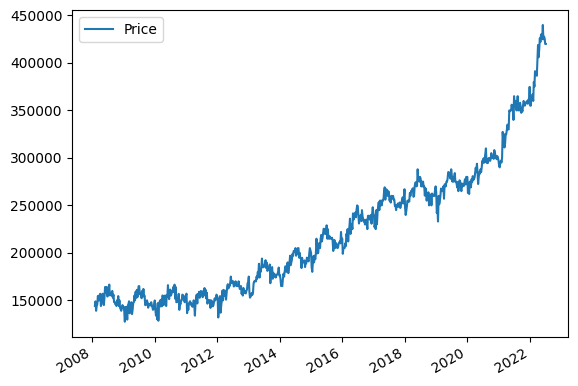

In [33]:
price_data.plot.line(y="Price", use_index=True)

House Value Change Including Inflation

In [34]:
price_data["adj_price"] = price_data["Price"] / price_data["CPI"] * 100

Creating our adjusted price by removing inflation as a factor

<Axes: >

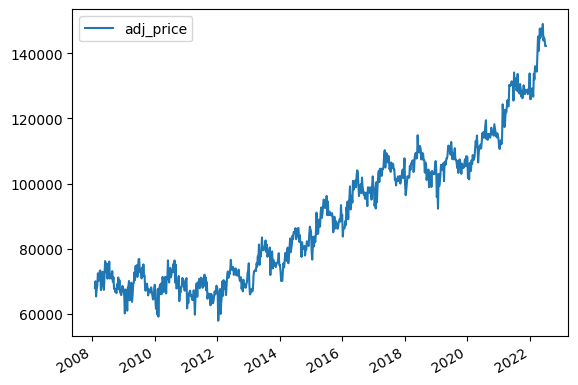

In [35]:
price_data.plot.line(y="adj_price",use_index=True)

House value change not including inflation

In [36]:
price_data["adj_value"] = price_data["Value"] / price_data["CPI"] * 100

In [37]:
price_data["next_quarter"] = price_data["adj_price"].shift(-13)

Using shift method to grab data 3 months into the future to bring it back into the current row

In [38]:
price_data

,Interest,Vacancy,CPI,Price,Value,adj_price,adj_value,next_quarter
2008-02-02,5.68,10.1,212.174,144250.0,157110.334849,67986.652464,74047.873372,72952.678339
2008-02-09,5.67,10.1,212.687,148900.0,157110.334849,70008.980333,73869.270265,70629.344634
2008-02-16,5.72,10.1,212.687,139000.0,157110.334849,65354.252963,73869.270265,67376.677447
2008-02-23,6.04,10.1,212.687,143700.0,157110.334849,67564.073028,73869.270265,71210.17806
2008-03-01,6.24,10.1,212.687,145900.0,157027.222613,68598.456887,73830.193013,76205.345526
...,...,...,...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,425000.0,401254.775442,143907.79066,135867.501707,None
2022-06-18,5.78,5.6,295.328,427750.0,401254.775442,144838.958717,135867.501707,None
2022-06-25,5.81,5.6,295.328,426000.0,401254.775442,144246.397226,135867.501707,None
2022-07-02,5.70,5.6,295.328,420000.0,396903.773679,142214.757829,134394.223941,None


In [39]:
price_data.dropna(inplace=True)

Removing rows that have a missing value

In [40]:
price_data

,Interest,Vacancy,CPI,Price,Value,adj_price,adj_value,next_quarter
2008-02-02,5.68,10.1,212.174,144250.0,157110.334849,67986.652464,74047.873372,72952.678339
2008-02-09,5.67,10.1,212.687,148900.0,157110.334849,70008.980333,73869.270265,70629.344634
2008-02-16,5.72,10.1,212.687,139000.0,157110.334849,65354.252963,73869.270265,67376.677447
2008-02-23,6.04,10.1,212.687,143700.0,157110.334849,67564.073028,73869.270265,71210.17806
2008-03-01,6.24,10.1,212.687,145900.0,157027.222613,68598.456887,73830.193013,76205.345526
...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,390000.0,376522.090399,135554.103466,130869.524101,143907.79066
2022-03-19,4.16,5.8,287.708,388000.0,376522.090399,134858.954217,130869.524101,144838.958717
2022-03-26,4.42,5.8,287.708,386500.0,376522.090399,134337.592281,130869.524101,144246.397226
2022-04-02,4.67,5.8,287.708,401911.0,391696.585402,139694.064816,136143.7935,142214.757829


In [41]:
price_data["Change"] = (price_data["next_quarter"] > price_data["adj_price"]).astype(int)

In [42]:
price_data

,Interest,Vacancy,CPI,Price,Value,adj_price,adj_value,next_quarter,Change
2008-02-02,5.68,10.1,212.174,144250.0,157110.334849,67986.652464,74047.873372,72952.678339,1
2008-02-09,5.67,10.1,212.687,148900.0,157110.334849,70008.980333,73869.270265,70629.344634,1
2008-02-16,5.72,10.1,212.687,139000.0,157110.334849,65354.252963,73869.270265,67376.677447,1
2008-02-23,6.04,10.1,212.687,143700.0,157110.334849,67564.073028,73869.270265,71210.17806,1
2008-03-01,6.24,10.1,212.687,145900.0,157027.222613,68598.456887,73830.193013,76205.345526,1
...,...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,390000.0,376522.090399,135554.103466,130869.524101,143907.79066,1
2022-03-19,4.16,5.8,287.708,388000.0,376522.090399,134858.954217,130869.524101,144838.958717,1
2022-03-26,4.42,5.8,287.708,386500.0,376522.090399,134337.592281,130869.524101,144246.397226,1
2022-04-02,4.67,5.8,287.708,401911.0,391696.585402,139694.064816,136143.7935,142214.757829,1


Change will be a 1 if the price goes up in the next three months and a 0 if the price goes down in the next three months

In [43]:
price_data["Change"].value_counts()

Change
1    408
0    314
Name: count, dtype: int64

This gives us how many weeks did the price go up (1) and price go down (0)

In [44]:
predictors = ["Interest", "Vacancy", "adj_price","adj_value"]
target = "Change"

We will be using "Interest", "Vacancy", "adj_price","adj_value" as our predictors to predict our target "Change"

CREATING OUR MACHINE LEARNING MODEL

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [46]:
START = 260
STEP = 52
def predict(train, test, predictors, target):
    rf = RandomForestClassifier(min_samples_split=10, random_state=1)
    rf.fit(train[predictors], train[target])
    preds = rf.predict(test[predictors])
    return preds

CREATING A BACKTESTING ENGINE

In [47]:
def backtest(data, predictors, target):
    all_preds = []
    for i in range(START, data.shape[0], STEP):
        train = price_data.iloc[:i]
        test = price_data.iloc[i:(i+STEP)]
        all_preds.append(predict(train, test, predictors, target))
        
    preds = np.concatenate(all_preds)
    return preds, accuracy_score(data.iloc[START:][target], preds)

MEASURING ERROR

In [48]:
preds, accuracy = backtest(price_data, predictors, target)

In [49]:
accuracy * 100

60.60606060606061

When our model made a prediction it was correct 59 percent of the time.

IMPROVING ACCURACY

In [50]:
yearly = price_data.rolling(52, min_periods=1).mean()

In [51]:
yearly

,Interest,Vacancy,CPI,Price,Value,adj_price,adj_value,next_quarter,Change
2008-02-02,5.680000,10.100000,212.174000,144250.000000,157110.334849,67986.652464,74047.873372,72952.678339,1.000000
2008-02-09,5.675000,10.100000,212.430500,146575.000000,157110.334849,68997.816399,73958.571819,71791.011487,1.000000
2008-02-16,5.690000,10.100000,212.516000,144050.000000,157110.334849,67783.295253,73928.804634,70319.566807,1.000000
2008-02-23,5.777500,10.100000,212.558750,143962.500000,157110.334849,67728.489697,73913.921042,70542.219620,1.000000
2008-03-01,5.870000,10.100000,212.584400,144350.000000,157093.712402,67902.483135,73897.175436,71674.844801,1.000000
...,...,...,...,...,...,...,...,...,...
2022-03-12,3.115000,5.934615,274.619904,352828.211538,331507.120230,128432.784926,120574.814229,133111.380121,0.673077
2022-03-19,3.136923,5.915385,275.056058,354039.750000,333154.394213,128667.984960,120980.990753,133370.069121,0.673077
2022-03-26,3.163269,5.896154,275.492212,355491.673077,334801.668196,128994.744586,121387.167278,133642.203620,0.673077
2022-04-02,3.193654,5.876923,275.928365,357163.038462,336740.759391,129395.488790,121894.772061,133857.524622,0.673077


This gives us our averages for the past year

In [52]:
yearly_ratios = [p+ "_year" for p in predictors]
price_data[yearly_ratios] = price_data[predictors]/yearly[predictors]

This takes interest rate and dividing it by average interest rate in the last year, same with vavcancy rate and price. (This gives our model good infomation to how the price is trending)

In [53]:
price_data

,Interest,Vacancy,CPI,Price,Value,adj_price,adj_value,next_quarter,Change,Interest_year,Vacancy_year,adj_price_year,adj_value_year
2008-02-02,5.68,10.1,212.174,144250.0,157110.334849,67986.652464,74047.873372,72952.678339,1,1.000000,1.000000,1.0,1.0
2008-02-09,5.67,10.1,212.687,148900.0,157110.334849,70008.980333,73869.270265,70629.344634,1,0.999119,1.000000,1.014655,0.998793
2008-02-16,5.72,10.1,212.687,139000.0,157110.334849,65354.252963,73869.270265,67376.677447,1,1.005272,1.000000,0.964165,0.999195
2008-02-23,6.04,10.1,212.687,143700.0,157110.334849,67564.073028,73869.270265,71210.17806,1,1.045435,1.000000,0.997572,0.999396
2008-03-01,6.24,10.1,212.687,145900.0,157027.222613,68598.456887,73830.193013,76205.345526,1,1.063032,1.000000,1.01025,0.999094
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,390000.0,376522.090399,135554.103466,130869.524101,143907.79066,1,1.235955,0.977317,1.055448,1.08538
2022-03-19,4.16,5.8,287.708,388000.0,376522.090399,134858.954217,130869.524101,144838.958717,1,1.326140,0.980494,1.048116,1.081736
2022-03-26,4.42,5.8,287.708,386500.0,376522.090399,134337.592281,130869.524101,144246.397226,1,1.397289,0.983692,1.041419,1.078117
2022-04-02,4.67,5.8,287.708,401911.0,391696.585402,139694.064816,136143.7935,142214.757829,1,1.462275,0.986911,1.07959,1.116896


In [54]:
preds, accuracy = backtest(price_data, predictors + yearly_ratios, target)

In [55]:
accuracy * 100

57.35930735930735

We can see that our accuracy has gone up to 65 percent which is significant

RUNNING DIAGNOSTICS ON THE MODEL

In [56]:
pred_match = (preds == price_data[target].iloc[START:])

This compares our predicted values to our actual values

In [57]:
pred_match[pred_match == True] = "green"
pred_match[pred_match == False] = "red"

C:\Users\gooda\AppData\Local\Temp\ipykernel_1868\1532675083.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'green' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  pred_match[pred_match == True] = "green"


<Axes: xlabel='index', ylabel='adj_price'>

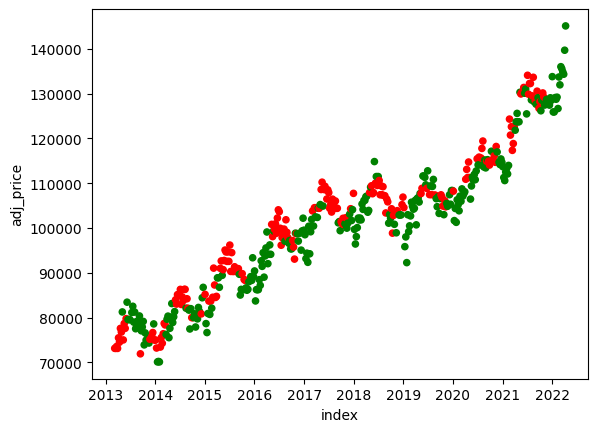

In [58]:
import matplotlib.pyplot as plt

plot_data = price_data.iloc[START:].copy()
plot_data.reset_index().plot.scatter(x="index",y="adj_price", color = pred_match)

Green dots indicate when we made a prediction that is correct, Red dots indicate when we made a prediction that is incorrect.

In [59]:
from sklearn.inspection import permutation_importance
rf = RandomForestClassifier(min_samples_split = 10, random_state = 1)
rf.fit(price_data[predictors], price_data[target])

result = permutation_importance(rf, price_data[predictors],price_data[target], n_repeats = 10, random_state = 1)

This checks which variables are the most important to the RandomForestModel to help it improve the predictive preformance

In [60]:
result["importances_mean"]

array([0.15858726, 0.17451524, 0.30858726, 0.25277008])

In [61]:
predictors

['Interest', 'Vacancy', 'adj_price', 'adj_value']

Gives us how important each variable is 0-1